# ML Evasion Workshop
# By Estevan Ramos





---



Hello , welcome to the ML Evasion workshop. Below I have a quick story and some coding challanges outlined to help you go from no knowledge in ML Evasion to working knowlege of what evasion is, how it works, and efforts to mitigate it.
>
>
Some things you might need is:



1.   Basic Understanding of Neural Networks(I will provide a quick rundown but some prior knowledge would be helpfull)
2.   Access to Google Colab or anything that can run .IPNYB notebooks
3. Basic understanding of 2d/3d arrays in python.

Other then those 3 things you're ready to go!



#Hello IMF Agent
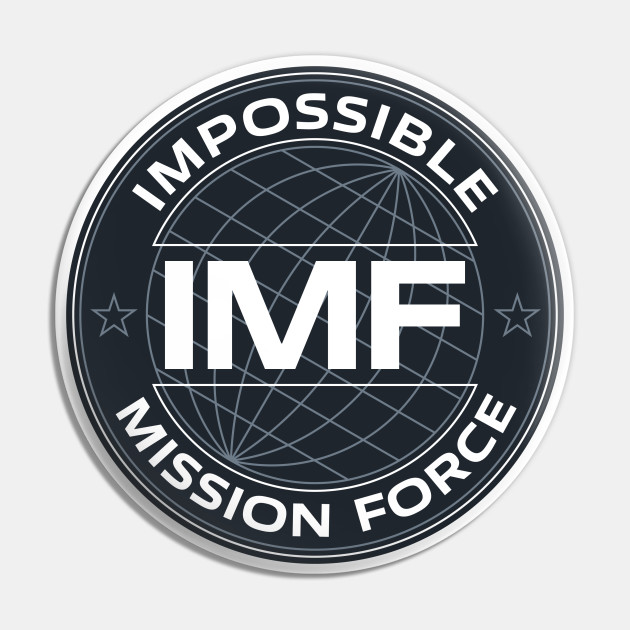
---
<blockquote>Welcome to your first mission at the Impossible Mission Force, as our newest recruite and Artifical Intellegence expert we have a task only you can complete.

Our Agents in the field need some help, there in a race aginst the terroist group 'Syndicate' to break into the kremlin and steal nuclear launch codes before Syndicate has a chance too.




##**Your Mission, should you choose to accept it, break into the kremlin AI and allow our agents to breakthrough and ensure Syndicate can not break through. Everything you need is below, this messege will now self destruct in 5.....4....3...2....**

# Getting Started
now that formalaties are out of the way lets look at what were going to be working with.
<br><br>

if your working in google colab this notebook is split up into sections to make it easier on the eyes and to allow for *rapid* development, there are sections of the notebook that serve to break it up and provide key info. 

<br>

Below is the first code section and serves to import some libaries and pre written functions.

In [1]:
# To Run this code snipit
# <<--- hit the play button
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *

Below we have what seems to be the same Neural Network that the Kremlin is using. We can use this in our testing to help our agents evade there AI

In [2]:
#kremlins Neural Network
def dense_model(inputs = 784,hidden_1=512, hidden_2=256, classes = 10):
  model = tf.keras.models.Sequential()
  model.add(Dense(hidden_1, input_shape=(inputs,)))
  model.add(Dropout(.25))
  model.add(BatchNormalization())
  model.add(Dense(hidden_2))
  model.add(Dropout(.25))
  model.add(BatchNormalization())
  model.add(Dense(128))
  model.add(Dropout(.25))
  model.add(BatchNormalization())
  model.add(Dense(64))
  model.add(Dropout(.25))
  model.add(BatchNormalization())
  model.add(Dense(classes , activation='softmax'))
  return model

dense = dense_model()
dense.summary() 
dense.compile(optimizer=tf.keras.optimizers.Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

Now that we have our model were going to have to train it, the way Machine Learning models work is basically

*   Get data
*   Split data into training and testing
*   Train model using training data
*   Once the model is trained evaluate its results on test set



<br>below we are loading data that the kremlin uses for the ID badge detections

In [3]:
#kremlin Data split into training and testing
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# we have to normalize the data to be between 0 and 1
x_train = np.float32(np.expand_dims(x_train, -1)/255)
x_test = np.float32(np.expand_dims(x_test, -1)/255)

# were going to use x and y later
x = x_test
y = y_test

#encoding the labels as 'one hot'
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print("Training set shape: " , x_train.shape)
print("Testing set shape: " , x_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
Training set shape:  (60000, 28, 28, 1)
Testing set shape:  (10000, 28, 28, 1)


You have some data lets see what it looks like

try changing the index of the image to get a better idea of what data your data looks like and what the One hot representation looks like.



The one hot representation of this is:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


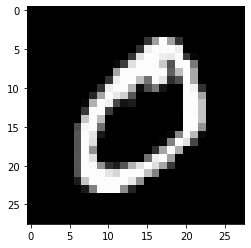

In [4]:
idx = 1 # edit this index

plt.imshow(x_train[idx].reshape(28, 28) , cmap= 'gray')
print('The one hot representation of this is: ', y_train[idx])

You now have the data but we have a small problem, its not the right shape, our Neural Network(NN) is expecting a img to be a 1d array of pixels.

we need to reshape our data to match what the network is expecting we have the shape above, we need to translate that to be (60,000, 784) why 784? because our 28 x 28 img equals  784 pixels

In [4]:
# Try and reshape the data
x_train_reshaped = x_train.reshape()
x_test_reshaped = x_test.reshape()

TypeError: ignored

once you think you got it go ahead and look at the answer below, after every excercise your going to have to run the answer to ensure that the rest of the notebook runs correctly

In [5]:
#@title Reshape Solution
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

Here below, we have to train the Neural Network so it works just as well as the kremlins version.

In [6]:
all_history = []

history = dense.fit(
    x_train, y_train,
    epochs =  3, 
    batch_size=256, 
    verbose = 1,
    validation_data=(x_test, y_test),
)

all_history.append(history)
print()
print('Final accuracy on training set: {:.4f}'.format(history.history['accuracy'][-1]))
print('Final accuracy on test set: {:.4f}'.format(history.history['val_accuracy'][-1]))
print('Mean accuracy in last 5 epochs: {:.4f}'.format(np.mean(history.history['val_accuracy'][-5:])))

Epoch 1/3
235/235 [==============================] - 5s 6ms/step - loss: 0.5020 - accuracy: 0.8537 - val_loss: 0.3105 - val_accuracy: 0.9105
Epoch 2/3
235/235 [==============================] - 1s 5ms/step - loss: 0.3842 - accuracy: 0.8905 - val_loss: 0.3105 - val_accuracy: 0.9135
Epoch 3/3
235/235 [==============================] - 1s 5ms/step - loss: 0.3613 - accuracy: 0.8963 - val_loss: 0.2947 - val_accuracy: 0.9207

Final accuracy on training set: 0.8963
Final accuracy on test set: 0.9207
Mean accuracy in last 5 epochs: 0.9149


So now you have the data to modify and the kremlins Neural network its time to get **evading**

# One Pixel Attack

the first attack that you're going to perform is goint to be the one pixel attack, you want to add one pixel to the dataset in such a way that it reduced the accuracy of the model.
<br><br>
Although sounding simple the dataset has 60,000 images. Where exactly should you put the one Pixel? This is a tough question, you need to find a position in every image that well maximize our loss of accuracy, but not every image is the same, the pixel location would be different for a one versus an eight etc.

First lets get a copy of our data to work with, we saved x and y as copy of our training data and indexes

In [6]:
#why is our label, basically what the img is supposed to look likem in x_train[0] is supposed to be a 5
print(y[:10])

[7 2 1 0 4 1 4 9 5 9]


we can use the y and sort our data to make it easier to work with, write a function to sort both x and y! as always the solution will be below if you get stuck (once you think you got it, just hit the solution so the rest of the notebook works properly)<br>
<br>Hint: I use np.argsort but you could also use zip or other sorting function to sort x and y in the same order

In [ ]:
#insert your code below
x_sorted = []
y_sorted = []

In [7]:
#@title Sort x and y Solution
#how to sort x and y
ind = np.argsort(y)
x_sort = x[ind]
y_sort = y[ind]

now that your data is sorted you should get the indecies of where it changes from 0 to 1 and 1 to 2 etc. 

In [8]:
#this code gets the indeces where indeces[0] = the start of 0 and indeces[1] = the start of 1
indeces = [0]
for i in range(len(y_sort)-1):
  if y_sort[i] != y_sort[i+1]:
    indeces.append(i+1)
indeces.append(len(y_sort))
print(indeces)

[0, 980, 2115, 3147, 4157, 5139, 6031, 6989, 8017, 8991, 10000]


to figure out the best location of 60,000 imgs indivudally would take way too much time were on the clock to break the AI before Syndicate does, you have the idea that instead of you should find a pixel location for all the 0s,1s,2s... at the same time.<br><br>
Maybe if you take the average image of all the imgs of a single label you can pick a general location of the pixel attack that would work for all images of that label.

In [ ]:
#try your idea below, average all the images of a single label together
mean_imgs = []
#your solution should start with something like this
for i in range(len(indeces) -1 ):
  #HINT: you could use a second for loop or array slicing like i did using the indeces array.
  sum_img = []
  mean_imgs.append(sum_imgs)
#once you have completed it, or get stuck look at the solution below

NameError: ignored

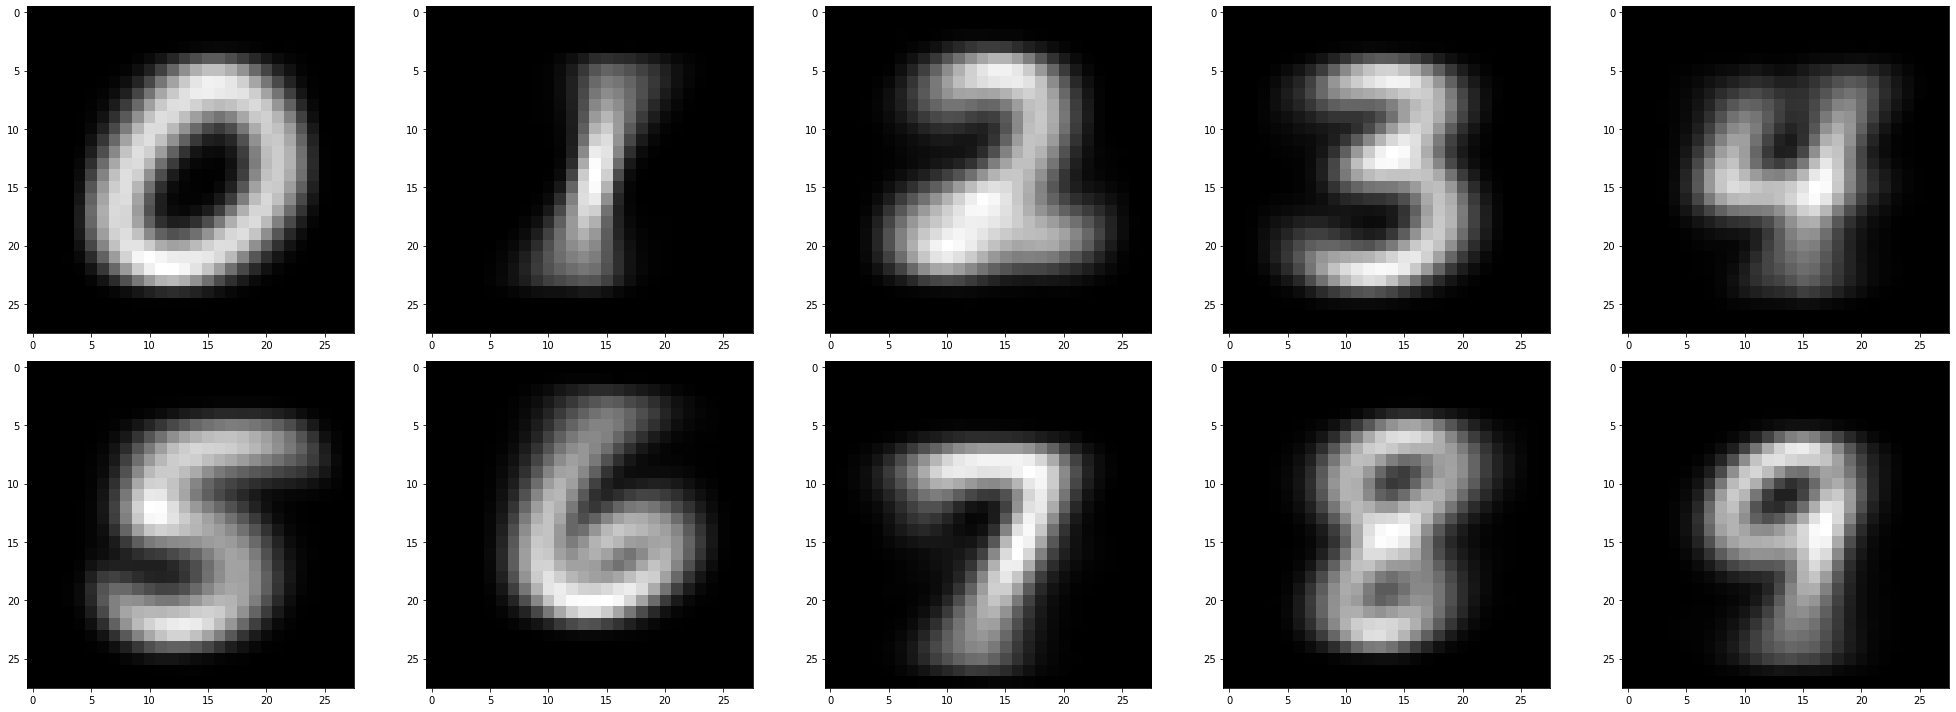

In [12]:
#@title Average Image Solution
figs ,ax = plt.subplots(nrows = 2, ncols = 5, figsize = (28, 10))
mean_imgs = []
for i in range(len(indeces)-1):
  #mean is the same thing as average we average all the imag from the first indece to the next
  #using the array and we mean all of them on the 0 axies
  sum_img = np.mean(x_sort[indeces[i]:indeces[i+1]], axis = 0)
  ax[i// 5 ,i %5 ].imshow(sum_img.reshape(28,28), cmap = 'gray')
  #We then append that img to mean img list
  mean_imgs.append(sum_img)

plt.tight_layout()
plt.show()

so thats what all the those mean images look like, its time to figure out where you should put your One Pixel Attack, In general you should put your pixel in a location that might confuse the model or get numbers to apear as something else. here are some locations I picked out

```python
locations = [[15,15],[10,5],[12,12],[13,5],[5,15],[12,17],[8,20],[12,12],[8,14],[11,13]]
```

Pick your own locations, below and remember the location you pick is going to be the top left corner of your attack. Also try to pick a location that is not going to touch most of the examples remember your looking at the average image.



In [13]:
pixel_locations = [[15,15],[10,5],[12,12],[13,5],[5,15],[12,17],[8,20],[12,12],[8,14],[11,13]]

Okay now that you have your locations picked out, we need to split theim into individual arrays to make it easier to work. one array for our x coordinates one array for the y coordinates.

In [ ]:
x_pixels = []
y_pixels = []

In [14]:
#@title Coordinate Splitting solution
x_pixels = [i[0] for i in pixel_locations]
y_pixels = [i[1] for i in pixel_locations]

You have all your pixel attack coordinates time to perform the attack!
---

The steps you are going to have to perform are


1.   make a copy of the entire dataset with only zeroes
2.   take that copy add one at the exact locations of your pixel with the correct size of that pixel for all the indeces
3.   add the original sorted array to the copy array
4.   Test the results
5.   Compare results to the sorted results

Step One: make a copy of the orginal sorted array

In [ ]:
#insert your code here
x_sorted = np.squeeze(x_sort, axis = -1)
one_pixel_attack = []

In [15]:
x_sorted = np.squeeze(x_sort, axis = -1)
one_pixel_attack = np.zeros_like(x_sorted)

Step Two: Take that copy add one at the correct pixel locations
<br><br>
To make this easier we have the indeces , x pixel locations , and y pixel locations arrays.
<br><br>
Try iterating through the indeces array and setting the everythin from indeces[i] to indeces[i+1] = 1
<br><br>
also try and make it so that the pixel size can be variable, i.e. pixel_size = 2 and this makes a 2x2 pixel in the image. 

In [ ]:
pixel_size = 1
for i in range(len(indeces)-1):
  #insert your code here


  

In [17]:
#pixels on the right and bottom edges will not work wwith this, but there not very effective pixel locations anyways
pixel_size = 3
for i in range(len(indeces)-1):
  one_pixel_attack[ indeces[i]:indeces[i+1], x_pixels[i]: x_pixels[i]+pixel_size , y_pixels[i]: y_pixels[i]+ pixel_size] = 1

Step Three: Add the sorted array and the attack array.

In [18]:
one_pixel_attack = x_sorted + one_pixel_attack

lets look at what our attack vectors look like.

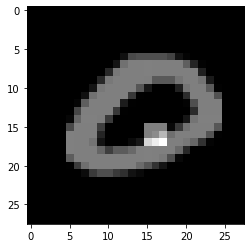

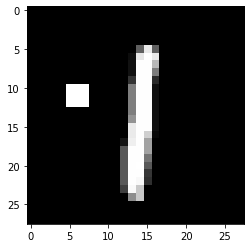

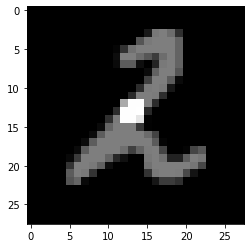

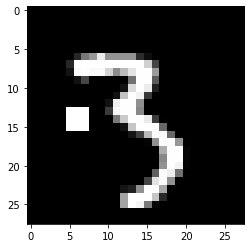

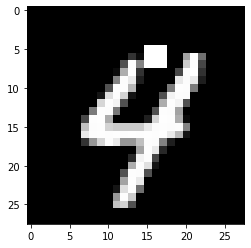

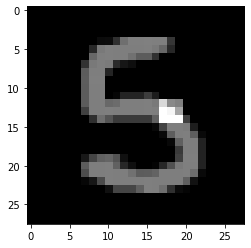

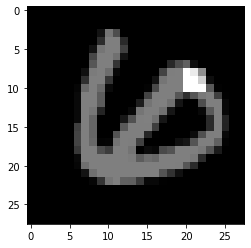

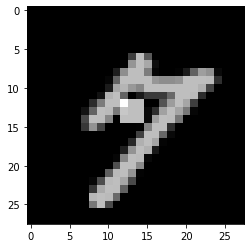

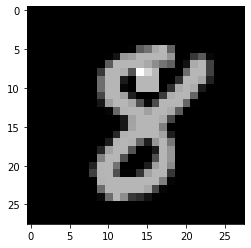

<Figure size 432x288 with 0 Axes>

In [19]:
for i in range(9):
  imgplot = plt.imshow(one_pixel_attack[indeces[i]+1].reshape(28,28), cmap = 'gray')
  plt.figure()

Step Four: Test our results
<br>

In [20]:
one_pixel_attack.shape

(10000, 28, 28)

In [16]:
max_change = 0
#Warning this will take a long time!
for i in range(len(indeces)-1):
  max_change = 0
  for j in range(indeces[i] , indeces[i+1]):
    index = j
    attack_pred = dense.predict(one_pixel_attack[index].reshape(1,784)).reshape(-1)
    original_pred = dense.predict(x_sorted[index].reshape(1,784)).reshape(-1)
    
    if original_pred[i]- attack_pred[i] > max_change:
      max_change = original_pred[i] - attack_pred[i]
      attack_confidence = attack_pred[i]
      original_confidence = original_pred[i]
    
  print('For Label ',i)
  print('highest confidence change: ' , max_change)
  print('Original Confidence : ' , original_confidence)
  print('Attack Confidence : ' , attack_confidence)
  print()


KeyboardInterrupt: ignored

Not Bad at all Agent, now lets look at our accuracy over the whole set

In [25]:
pred= dense.predict(one_pixel_attack.reshape(one_pixel_attack.shape[0], -1))
one_pixel_predicts = np.argmax(pred[:] , axis = 1)
np.mean(one_pixel_predicts == y_sort)

0.7555

Now we compare the Original accuracy too our One Pixel attack accuracy

In [34]:
og_pred = dense.predict(x_sort.reshape(x_sort.shape[0], -1))
og_predicts = np.argmax(og_pred[:] , axis = 1) 

print('Original Accuracy is: ' , np.mean(og_predicts == y_sort))
print('The One Pixel Attack Accuracy is: ' , np.mean(one_pixel_predicts == y_sort))

Original Accuracy is:  0.9207
The One Pixel Attack Accuracy is:  0.7555


Great Work Agent you well on your way to breaking there AI, But these results arent good enough just yet we need to work some more and ensure that our 

# FGSM Attack

In [9]:
image = x_train[0].reshape(1, 784)
label = y_train[0].reshape(1,10)

In [10]:
image = tf.convert_to_tensor(image)

In [11]:
x_img = x_train[0]

In [12]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label, model):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    #we dont have to use model.predict because its assuming the input image is a tensor
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)

  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  
  return signed_grad

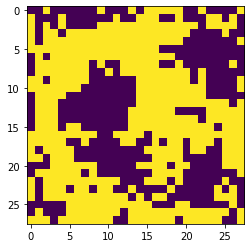

In [13]:
perturbations = create_adversarial_pattern(image, label, dense)
adv = perturbations.numpy()
plt.imshow(adv.reshape(28,28) * 0.5 + 0.5);  # To change [-1, 1] to [0,1]

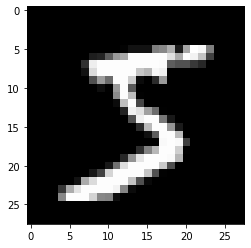

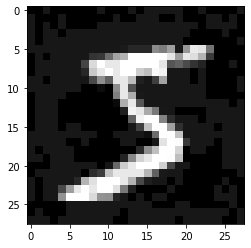

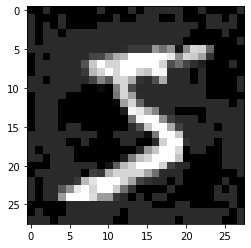

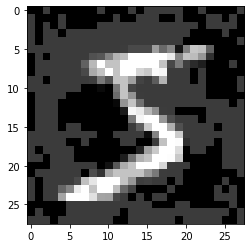

In [14]:
epsilons = [0, 0.05, 0.1, 0.15]
for i, eps in enumerate(epsilons):
  plt.figure()
  adv_x = x_img + eps*perturbations.numpy()
  imgplot = plt.imshow(adv_x.reshape(28,28)*0.5 + 0.5 , cmap = 'gray')